**10024134 | Eszra Forenita Sigalingging**

In [31]:
# LOADING DATA

# Import scikit-learn dataset libray
from sklearn import datasets
import pandas as pd
# Load dataset
cancer = datasets.load_breast_cancer()

dataset = pd.DataFrame(cancer.data, columns=cancer.feature_names).head()
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
# EXPLORING DATA

# print the names of the features
print("Feature:\n", cancer.feature_names)

# print the label type of cancer classification (malignant or benign)
print("Labels:\n", cancer.target_names)

Feature:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:
 ['malignant' 'benign']


In [33]:
# SPLITTING DATA

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=109)

In [34]:
# GENERATING MODEL

# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear')  # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)


In [35]:
# EVALUATING MODEL

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print('Accurary: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision, what percentage of positive tuples are labeled as such?
print("Precision: ", metrics.precision_score(y_test, y_pred))

# Model Recall, what percentage of positive tuples are labelled as such?
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accurary:  0.9649122807017544
Precision:  0.9811320754716981
Recall:  0.9629629629629629


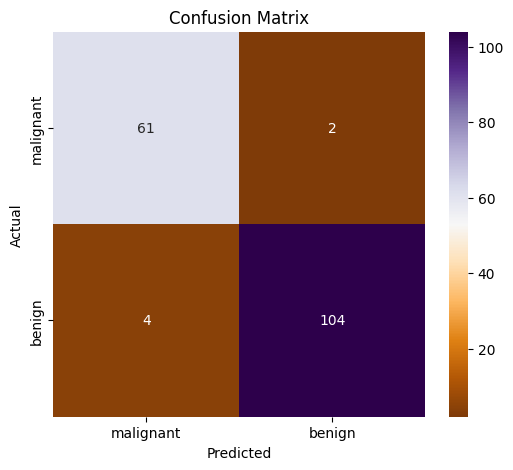

In [38]:
# VISUALIZATION

import matplotlib.pyplot as plt


# CONFUSION MATRIX

conf_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuOr", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Grafik *confusion matrix* ini dapat membantu dalam merepresentasikan hasil prediksi model klasifikasi dibanding dengan label sebenarnya. Terlihat bahwa model berhasil mengklasifikasikan 61 kasus kanker sebagai *malignant* dan 104 kasus sebagai *benign* secara benar. Namun terdapat 2 kasus *malignant* dan 4 kasus *benign* yang salah klasifikasi. Ini menunjukkan bahwa performa model sudah cukup baik dalam memprediksi karena jumlah kesalahan dapat dikatakan cukup kecil.

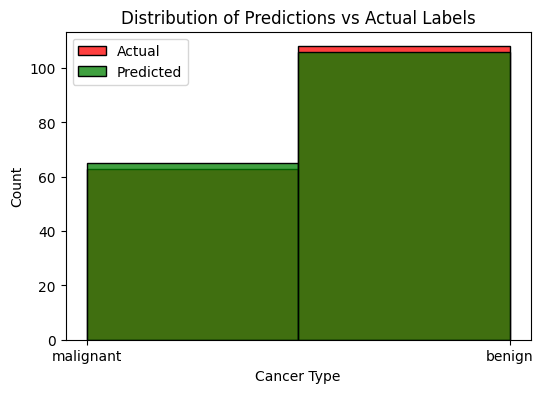

In [39]:
# HISTOGRAM OF PREDICTIONS

plt.figure(figsize=(6, 4))
sns.histplot(y_test, color="red", bins=2, kde=False, label="Actual", stat="count")
sns.histplot(y_pred, color="green", bins=2, kde=False, label="Predicted", stat="count")
plt.xticks([0, 1], cancer.target_names)
plt.title("Distribution of Predictions vs Actual Labels")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.legend()
plt.show()

Grafik distribusi jumlah data antara lebel aktual dan prediksi di atas juga menunjukkan performa model di mana model menghasilkan prediksi yang cukup seimbang yang dapat dilihat dari panjang bar yang hampir sama sehingga dapat disimpulkan bahwa model tidak terlalu bias terhadap salah satu kelas.